In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [124]:
df=pd.read_csv("/content/spam.csv",encoding='latin1')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [126]:
##Removing the Column

df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [128]:
#changing the COlumn name fom v1, v2 to something change
df.rename(columns={'v1': "target",'v2':"text"},inplace=True)


In [129]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [130]:
df.isnull().sum()

,0
target,0
text,0


In [131]:
df.duplicated().sum()

np.int64(403)

In [132]:
df=df.drop_duplicates(keep="first")

In [133]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [134]:
df.shape

(5169, 2)

In [135]:
##EDA
##How much msgs are spam and how much are ham

df['target'].value_counts()


,count
target,
0,4516
1,653


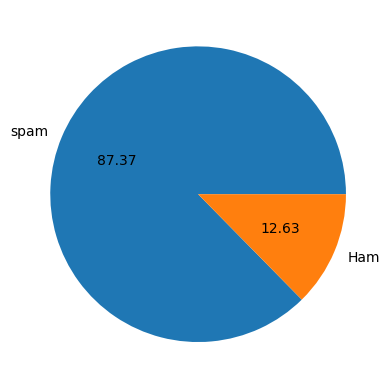

In [136]:
plt.pie(df['target'].value_counts(),labels=["spam","Ham"],autopct="%0.2f")
plt.show()

In [ ]:
# Data is Completely imbalanced
%pip install nltk
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [138]:
df["Num_charaters"]=df['text'].apply(len)

In [139]:
##Number of words
nltk.download("punkt_tab")

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,target,text,Num_charaters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [140]:
##No of sentences
df["num_sentences"]=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [141]:
df

,target,text,Num_charaters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [142]:
df[["Num_charaters","num_words"	,"num_sentences"]].describe()

,Num_charaters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [143]:
df.loc[df['target']==0, ["Num_charaters","num_words","num_sentences"]].describe()

,Num_charaters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [144]:

df.loc[df['target']==1, ["Num_charaters","num_words","num_sentences"]].describe()

,Num_charaters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


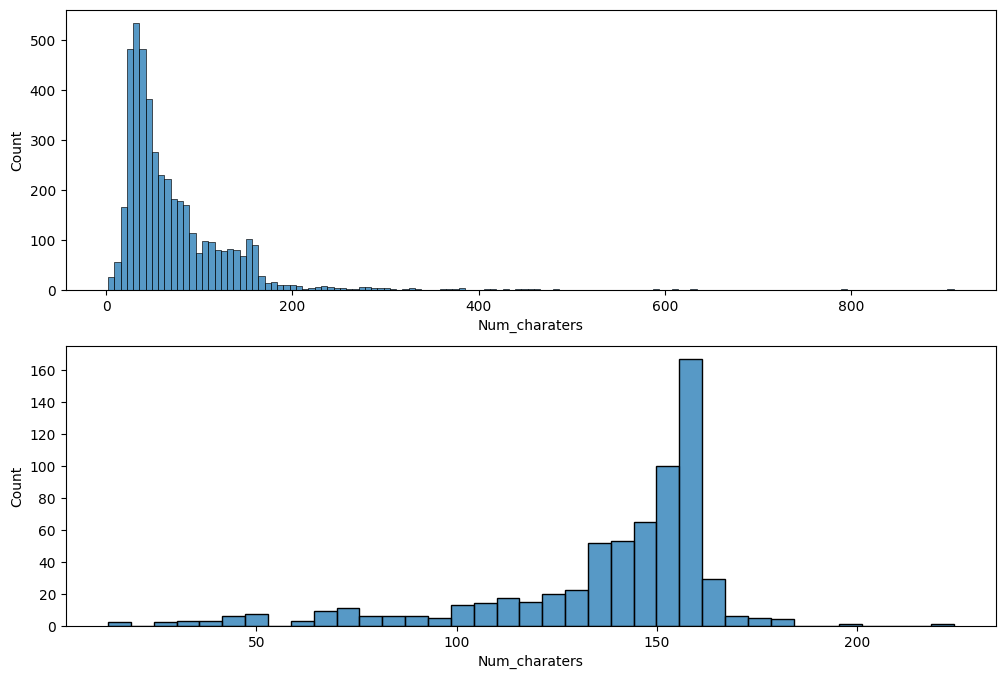

In [145]:

import seaborn as sns
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.histplot(df[df['target']==0]["Num_charaters"])
plt.subplot(2,1,2)
sns.histplot(df[df['target']==1]["Num_charaters"])
plt.show()


<Axes: xlabel='num_words', ylabel='Count'>

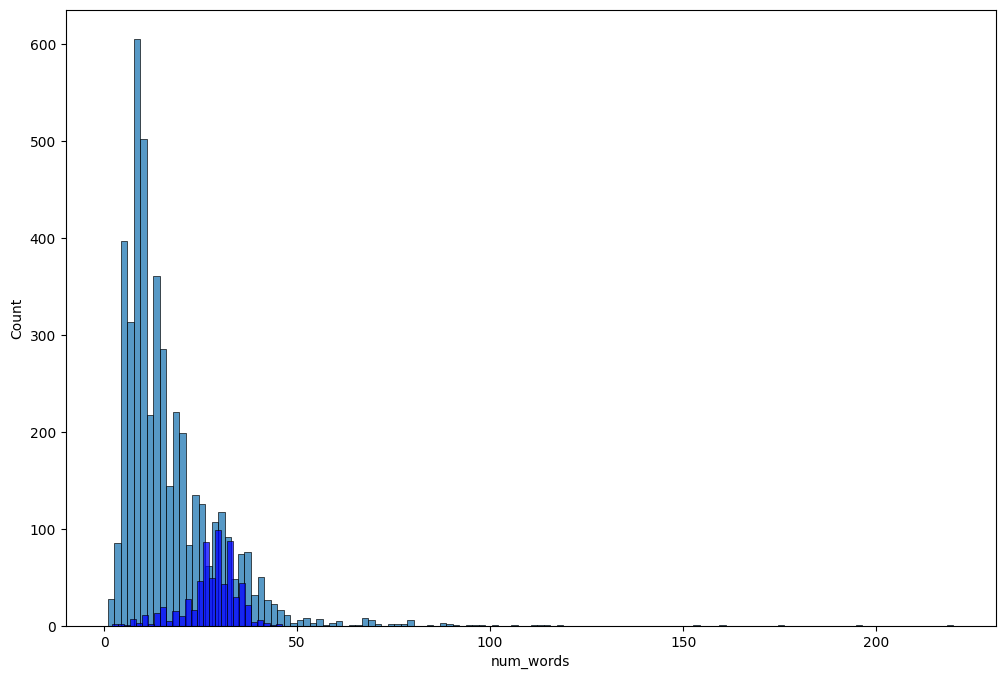

In [146]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color="b")

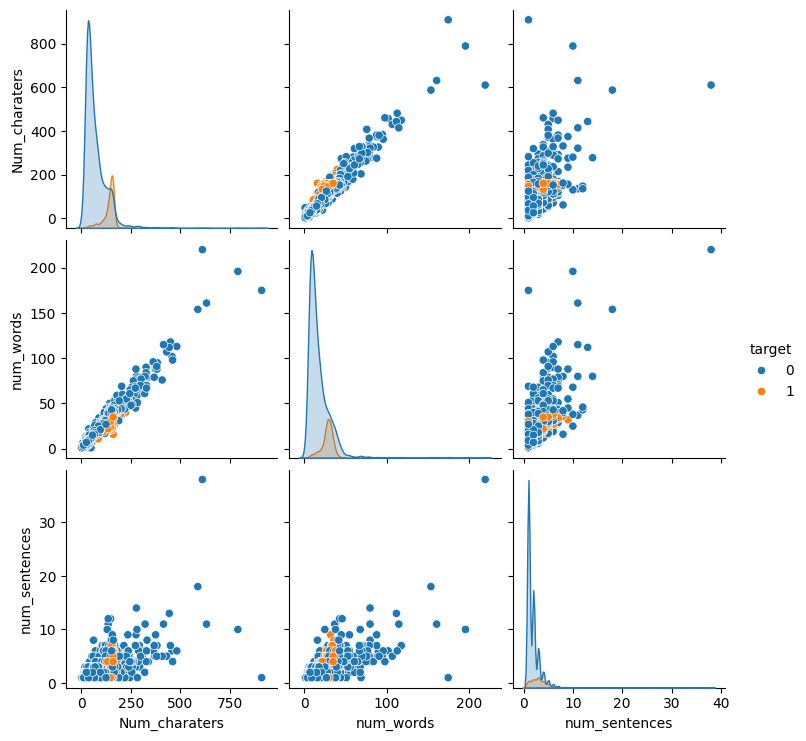

In [147]:
sns.pairplot(df,hue="target")

In [148]:
a=df[['target',"Num_charaters","num_words" ,"num_sentences"]].corr()

<Axes: >

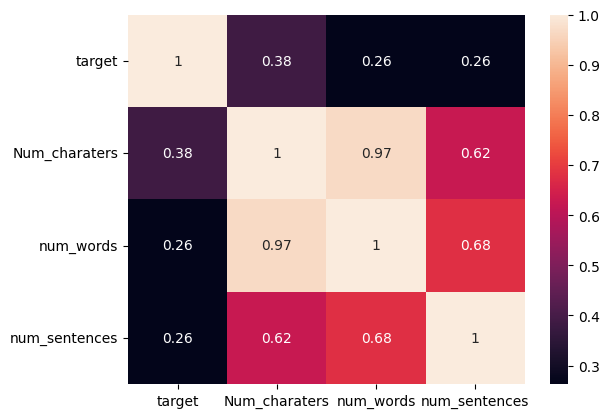

In [149]:

sns.heatmap(a,annot=True)

In [150]:
##Data Preprocessing
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from string import punctuation
nltk.download("stopwords")
from nltk.corpus import stopwords
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [151]:
transform_text("How are u ? My self Krishna mittal")

'u self krishna mittal'

In [152]:
df["transformed_text"]=df["text"].apply(transform_text)

In [153]:
df

,target,text,Num_charaters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


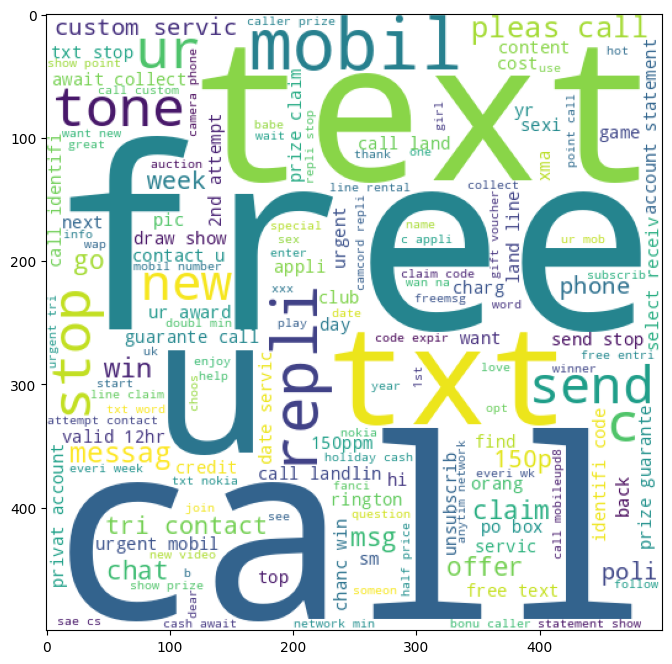

In [154]:
##Lets make a word cloud from both spam and ham messages

from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))


plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

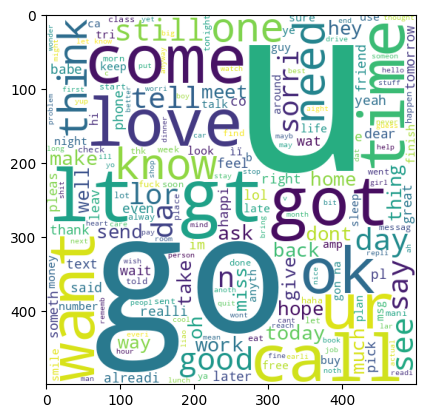

In [155]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [156]:
##Words mostly used in spam msg i.e target==1
spam_corpus=[]
for message in df[df['target']==1]['transformed_text'].tolist():
  for word in message.split():
    spam_corpus.append(word)


<Axes: xlabel='words', ylabel='count'>

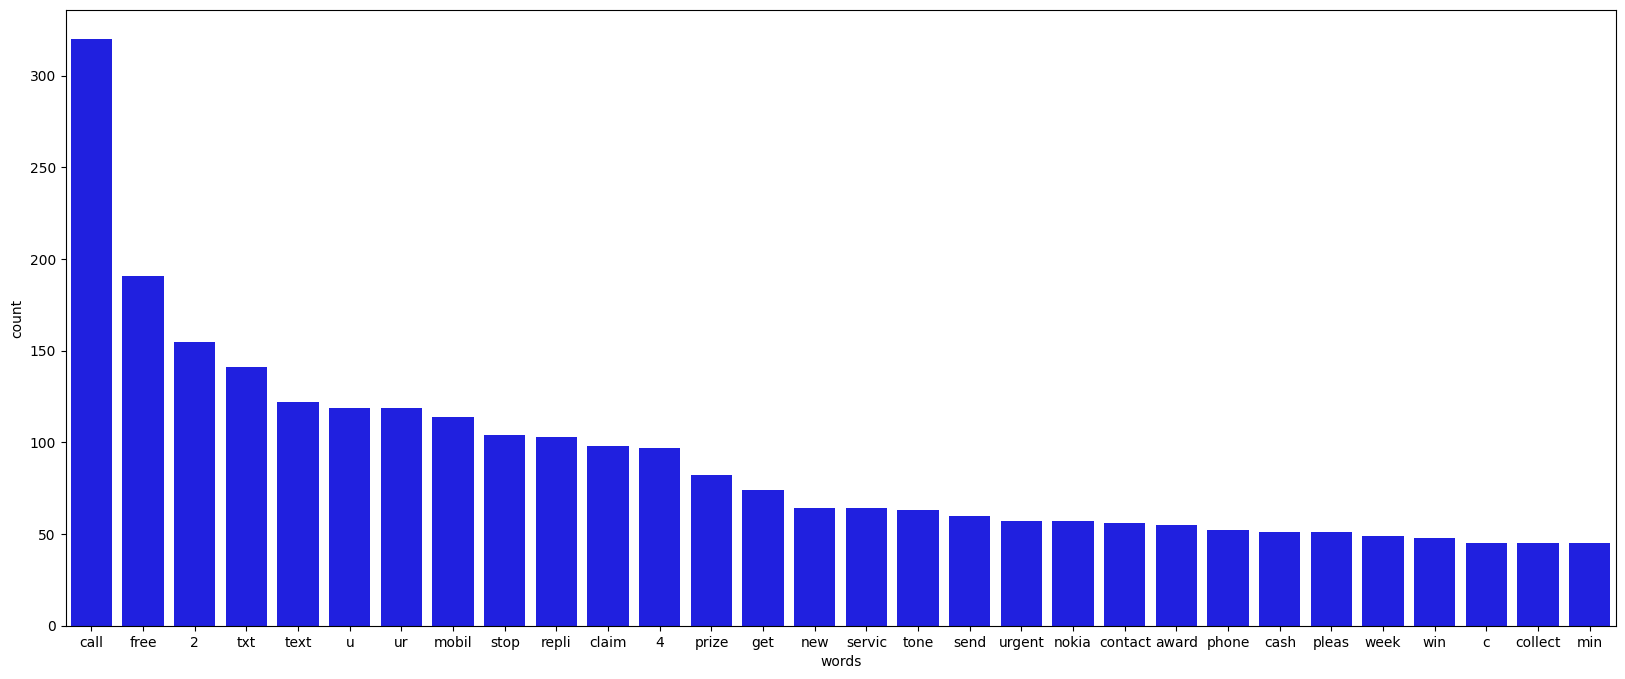

In [157]:
from collections import Counter
d=pd.DataFrame(Counter(spam_corpus).most_common(30))
d.rename(columns={0:"words", 1:"count"},inplace=True)
plt.figure(figsize=(20,8))
sns.barplot(x=d['words'],y=d['count'],color="blue")

In [158]:
df

,target,text,Num_charaters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


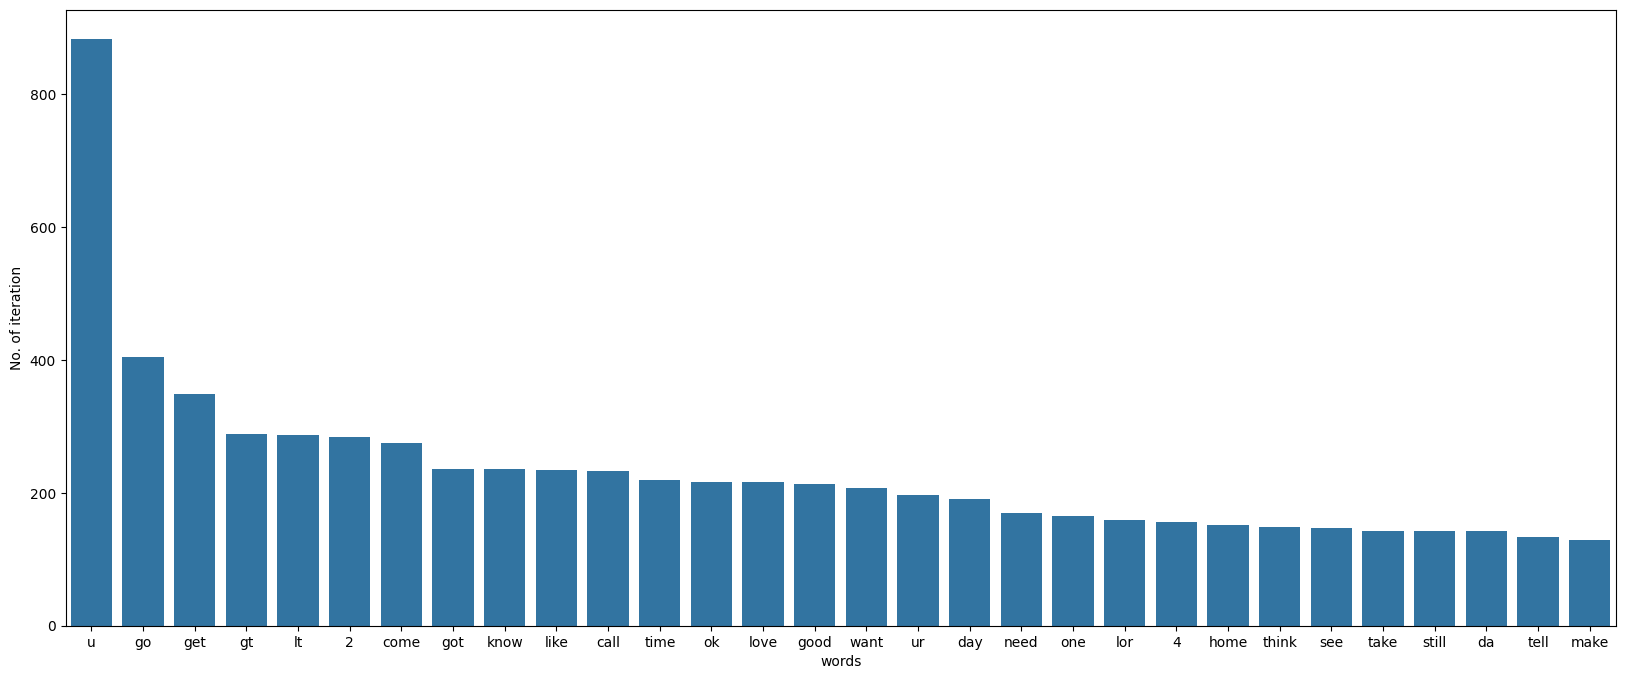

In [159]:
ham_corpus=[]
for i in df[df['target']==0]['transformed_text'].tolist():
  for word in i.split():
    ham_corpus.append(word)
from collections import Counter
p=pd.DataFrame(Counter(ham_corpus).most_common(30))
p.rename(columns={0:"words",1:"No. of iteration"},inplace=True)
plt.figure(figsize=(20,8))
sns.barplot(x=p['words'],y=p['No. of iteration'])
plt.show()


In [160]:
##Model Building

##By Count Vectorizerr


from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(df['transformed_text']).toarray()

In [161]:
X.shape

(5169, 6708)

In [162]:
y=df['target'].values

In [163]:
y.shape

(5169,)

In [164]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


gnb.fit(X_train,y_train)
mnb.fit(X_train,y_train)
bnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
y_pred2=mnb.predict(X_test)
y_pred3=bnb.predict(X_test)

print('Metrics for : GaussianNB')
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(35*'------->')

print("Metrics for : MultinomialNB")
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(35*'------->')

print("Metrics for : BernoulliNB")

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(35*'------->')

Metrics for : GaussianNB
0.8931334622823984
[[3267  364]
 [  78  427]]
0.5398230088495575
------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->
Metrics for : MultinomialNB
0.9743713733075435
[[3591   40]
 [  66  439]]
0.9164926931106472
------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->
Metrics for : BernoulliNB
0.8870889748549323
[[3629    2]
 [ 465   40]]
0.9523809523809523
------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->----

In [165]:
##Now lets use the tfidf vectorizer


from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfidf=TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['transformed_text']).toarray()

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
y=df['target'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

gnb.fit(X_train,y_train)
mnb.fit(X_train,y_train)
bnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
y_pred2=mnb.predict(X_test)
y_pred3=bnb.predict(X_test)

print('Metrics for : GaussianNB')
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(35*'------->')

print("Metrics for : MultinomialNB")
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(35*'------->')

print("Metrics for : BernoulliNB")

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(35*'------->')


Metrics for : GaussianNB
0.8762088974854932
[[784 112]
 [ 16 122]]
0.5213675213675214
------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->
Metrics for : MultinomialNB
0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461
------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->
Metrics for : BernoulliNB
0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187
------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->------->-

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


svc=SVC(kernel='sigmoid',gamma=1.0)
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier(max_depth=5)
rf=RandomForestClassifier(n_estimators=50,random_state=2,max_depth=5)
lr=LogisticRegression(solver='liblinear',penalty='l1')
ada=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2,max_depth=5)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)
mnb=MultinomialNB()

In [173]:
clf={
    'SVM':svc
    ,'KNN':knn
    ,'LR':lr
    ,'DT':dt
    ,'RF':rf
    ,'AdaBoost':ada
    ,'BgC':bc
    ,'ETC':etc
    ,'GBDT':gbdt
    ,'xgb':xgb
    ,'MNB':mnb
}




In [174]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision

In [175]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9700193423597679, 0.9421487603305785)

In [176]:
accuracy_scores=[]
precision_scores=[]
for name,clf_model in clf.items():
  current_accuracy,current_precision=train_classifier(clf_model,X_train,y_train,X_test,y_test)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

performance=pd.DataFrame({"Algorithm":clf.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores}).sort_values(by=["Precision"],ascending=False)

In [177]:
performance

,Algorithm,Accuracy,Precision
4,RF,0.869439,1.000000
1,KNN,0.905222,0.976190
2,LR,0.967118,0.964286
9,xgb,0.968085,0.948718
10,MNB,0.978723,0.946154
0,SVM,0.970019,0.942149
8,GBDT,0.950677,0.930693
6,BgC,0.958414,0.868217
3,DT,0.933269,0.841584
5,AdaBoost,0.921663,0.820225


In [172]:
##Let's improve the model

##Hypermeter tunnig


#change the max_features of Tf- idf (Have already Changed)

##Lets scale the tf idf using the min maxx_scaling function...






##Voting Classifirer

I will use the combination of my best performing model

In [181]:
svc=SVC(probability=True,kernel='sigmoid',gamma=1.0)
knn=KNeighborsClassifier()
mnb=MultinomialNB()
rf=RandomForestClassifier(n_estimators=50,random_state=2,max_depth=5)

from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[('svc',svc),('knn',knn),('rf',rf),('mnb',mnb)],voting='soft')
vc.fit(X_train,y_train)
y_pred=vc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9700193423597679
[[895   1]
 [ 30 108]]
0.9908256880733946


In [183]:
##APPLY STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

estimator=[('svm',svc),('knn',knn),('rf',rf),('mnb',mnb)]
final_estimator = RandomForestClassifier()
sc=StackingClassifier(estimators=estimator,final_estimator=final_estimator)
sc.fit(X_train,y_train)
y_pred=sc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9835589941972921
[[892   4]
 [ 13 125]]
0.9689922480620154


In [185]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rf,open('model.pkl','wb'))
